## Week 10: Decision Trees

```
- Machine Learning, Innopolis University (Fall semester 2024)
- Instructors: Adil Khan & Gcinizwe Dlamini
```
<hr>


```
Lab Plan
1. Decision Trees:
    - Visualize DT
    - Gini, entropy
    - Information Gain
    - Regression Trees
    
2. Comparison between models
    - Linearly Seperable
    - Boolean XOR
    - Moons
    - Circles
```

<hr>

![](https://i0.wp.com/why-change.com/wp-content/uploads/2021/11/Decision-Tree-elements-2.png?resize=715%2C450&ssl=1)

## 1. Decision Trees
### Recap

1.  What do leaves and branches represent in Decision trees?
2. When do we stop splitting the tree?
3. What is Entropy?
4. What is Information Gain?


The dataset that we will work on is the same dataset that we saw before which is Iris image calssification.

In [1]:
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_text
from sklearn import tree
import pandas as pd

iris = datasets.load_iris()
X = iris['data']
y = iris['target']


pd.DataFrame(iris.data,columns=iris.feature_names).head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
decision_tree = DecisionTreeClassifier()
decision_tree = decision_tree.fit(X, y)
r = export_text(decision_tree, feature_names=iris['feature_names'])
print(r)

|--- petal width (cm) <= 0.80
|   |--- class: 0
|--- petal width (cm) >  0.80
|   |--- petal width (cm) <= 1.75
|   |   |--- petal length (cm) <= 4.95
|   |   |   |--- petal width (cm) <= 1.65
|   |   |   |   |--- class: 1
|   |   |   |--- petal width (cm) >  1.65
|   |   |   |   |--- class: 2
|   |   |--- petal length (cm) >  4.95
|   |   |   |--- petal width (cm) <= 1.55
|   |   |   |   |--- class: 2
|   |   |   |--- petal width (cm) >  1.55
|   |   |   |   |--- sepal length (cm) <= 6.95
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- sepal length (cm) >  6.95
|   |   |   |   |   |--- class: 2
|   |--- petal width (cm) >  1.75
|   |   |--- petal length (cm) <= 4.85
|   |   |   |--- sepal length (cm) <= 5.95
|   |   |   |   |--- class: 1
|   |   |   |--- sepal length (cm) >  5.95
|   |   |   |   |--- class: 2
|   |   |--- petal length (cm) >  4.85
|   |   |   |--- class: 2



## Visualize decision tree with Graphviz

### What is Graphviz?

Now let's see what kind of trees can we build with Sklearn. Then visualize with graphviz

Troubleshooting :

`Linux` : make sure that you have graphviz installed through terminal using `sudo apt-get install graphviz`
`Mac` : install through terminal using `brew install graphviz`

In [5]:
!pip install graphviz

   ---------------------------------------- 0.0/47.1 kB ? eta -:--:--
   -------- ------------------------------- 10.2/47.1 kB ? eta -:--:--
   -------------------------- ------------- 30.7/47.1 kB 330.3 kB/s eta 0:00:01
   ---------------------------------------- 47.1/47.1 kB 396.6 kB/s eta 0:00:00


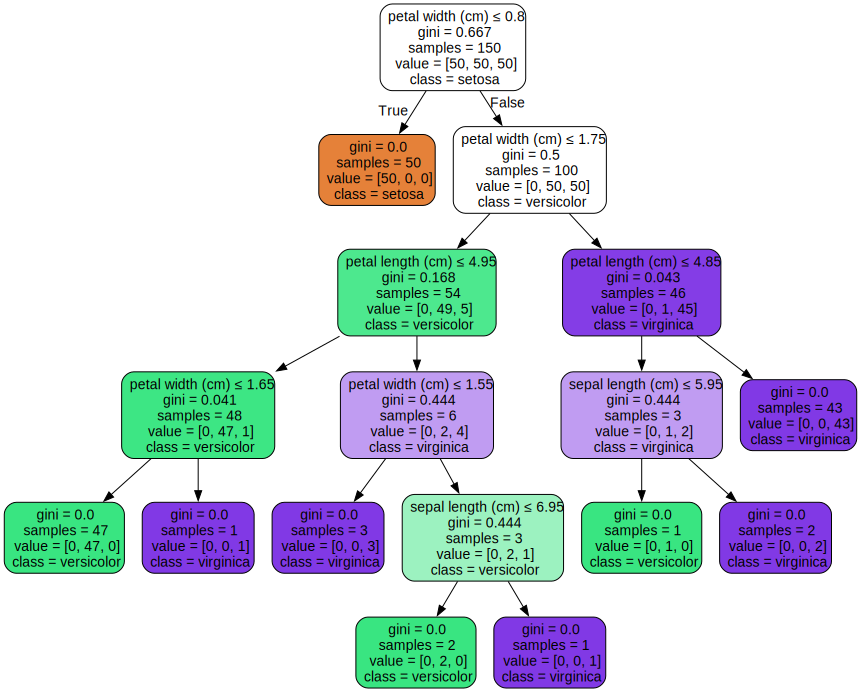

In [5]:
import graphviz
def plot_tree(clf):
    dot_data = tree.export_graphviz(clf, out_file=None,
                                    feature_names=iris.feature_names,
                                    class_names=iris.target_names,
                                    filled=True, rounded=True,
                                    special_characters=True)
    return graphviz.Source(dot_data)

graph = plot_tree(decision_tree)
graph

## Measures for Impurity

Let's use a smaller Decision Tree and try to recreate some values on it.

<table><tr>
<td> <img src="https://miro.medium.com/max/565/1*M15RZMSk8nGEyOnD8haF-A.png" alt="" style="width: 500px;"/> </td>
<td> <img src="https://qph.fs.quoracdn.net/main-qimg-93d3fa675b807bc505ef905c828d6c6d" alt="" style="width: 500px;"/> </td>
</tr></table>

<strong>Calculate the gini and entropy of the second branch (Petal width (cm) <= 1.75)</strong>

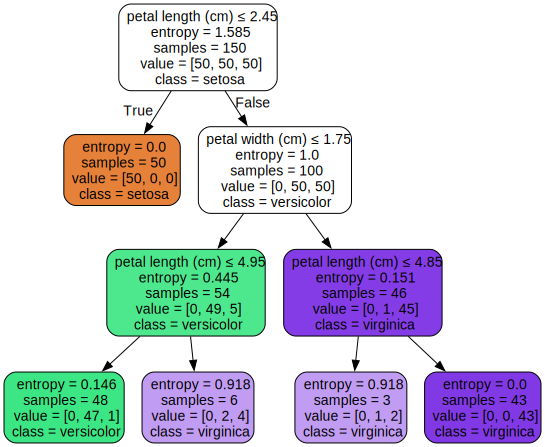

In [7]:
decision_tree = DecisionTreeClassifier(criterion = "entropy", max_depth=3)
decision_tree = decision_tree.fit(X, y)
plot_tree(decision_tree)

## Calculation of Gini index & Entropy

**Gini index** measures the inequality among values and is calculated as
$$1 - \sum{p_i^{2}}$$
where $p_i$ is the proportion of a class.<br><br>

**Entropy measures** the uncertainty or randomness of the values and is calculated as
$$-\sum{p_i \text{log} (p_i)}$$

In [13]:
import numpy as np
from collections import Counter

def gini(values):
    """Calculate the Gini index for an array of values."""
    # TODO: Calculate the Gini index
    total = len(values)
    counts = Counter(values)
    probs = [count / total for count in counts.values()]
    gini_index = 1 - sum(p ** 2 for p in probs)
    return gini_index

def entropy(values):
    """Calculate the entropy for an array of values."""
    # TODO: Calculate the entropy
    total = len(values)
    counts = Counter(values)
    probs = [count / total for count in counts.values()]
    gini_index = - sum(p * np.log2(p) for p in probs if p > 0)
    entropy_value = None
    return entropy_value

values = np.array([10, 10, 50, 10, 50, 10])
print("Gini: {}, Entropy: {:.04f}".format(gini(values), entropy(values)))


TypeError: unsupported format string passed to NoneType.__format__

## Calculation of Information Gain

In [15]:
def information_gain(parent, children):
    """Calculate the information gain from splitting parent into children."""
    total = parent.sum()
    # Entropy of the parent node
    parent_entropy = entropy(parent)

    # Weighted entropy of the child nodes
    weighted_child_entropy = 0
    for child in children:
        child_weight = child.sum() / total
        weighted_child_entropy += child_weight * entropy(child)

    # Information gain is the difference between parent entropy and weighted child entropy
    info_gain = parent_entropy - weighted_child_entropy
    return info_gain

# Example usage
parent = np.array([50, 50, 50])
children = np.array([[50, 0, 0], [0, 50, 50]])

ig = information_gain(parent, children)
print("Information gain: {:.03f}".format(ig))

TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'

## Regression Trees

Basic Concept:
* Split the data as before.
* To minimize the variance of the leaf node values.
* Take the mean as the prediction


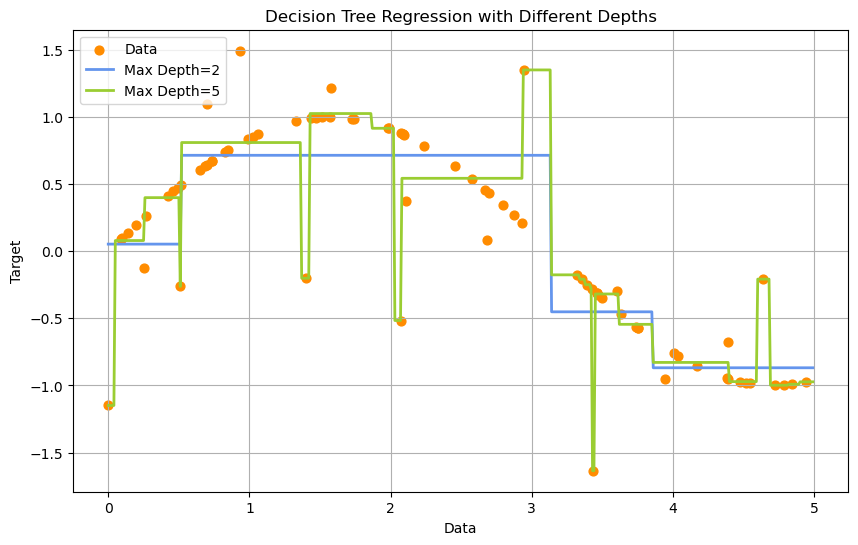

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()

# Add noise to every 5th point
y[::5] += 3 * (0.5 - rng.rand(16))

# Fit regression models
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X, y)
regr_2.fit(X, y)

# Predict on test data
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(X, y, s=40, color="darkorange", label="Data")
plt.plot(X_test, y_1, color="cornflowerblue", label="Max Depth=2", linewidth=2)
plt.plot(X_test, y_2, color="yellowgreen", label="Max Depth=5", linewidth=2)

# Labeling and visual tweaks
plt.xlabel("Data")
plt.ylabel("Target")
plt.title("Decision Tree Regression with Different Depths")
plt.legend(loc="upper left")
plt.grid(True)
plt.show()


# 2. Comparison Between models
Now that you know multiple types of classifiers:
1. Linear
  * Logistic Regression
  * SVM-(with linear kernel)
2. Non-Linear
  * SVM-(with non linear kernel)
  * Decision Trees
  
Let's take a look how their decision boundaries look like.

## Comparison on iris dataset

In [21]:
!pip install mlxtend

   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
    --------------------------------------- 0.0/1.4 MB 325.1 kB/s eta 0:00:05
   - -------------------------------------- 0.1/1.4 MB 558.5 kB/s eta 0:00:03
   --- ------------------------------------ 0.1/1.4 MB 717.5 kB/s eta 0:00:02
   ------ --------------------------------- 0.2/1.4 MB 1.1 MB/s eta 0:00:02
   -------- ------------------------------- 0.3/1.4 MB 1.2 MB/s eta 0:00:01
   -------------- ------------------------- 0.5/1.4 MB 1.9 MB/s eta 0:00:01
   ---------------------- ----------------- 0.8/1.4 MB 2.3 MB/s eta 0:00:01
   ---------------------------------- ----- 1.3/1.4 MB 3.2 MB/s eta 0:00:01
   ---------------------------------------  1.4/1.4 MB 3.3 MB/s eta 0:00:01
   ---------------------------------------- 1.4/1.4 MB 3.2 MB/s eta 0:00:00


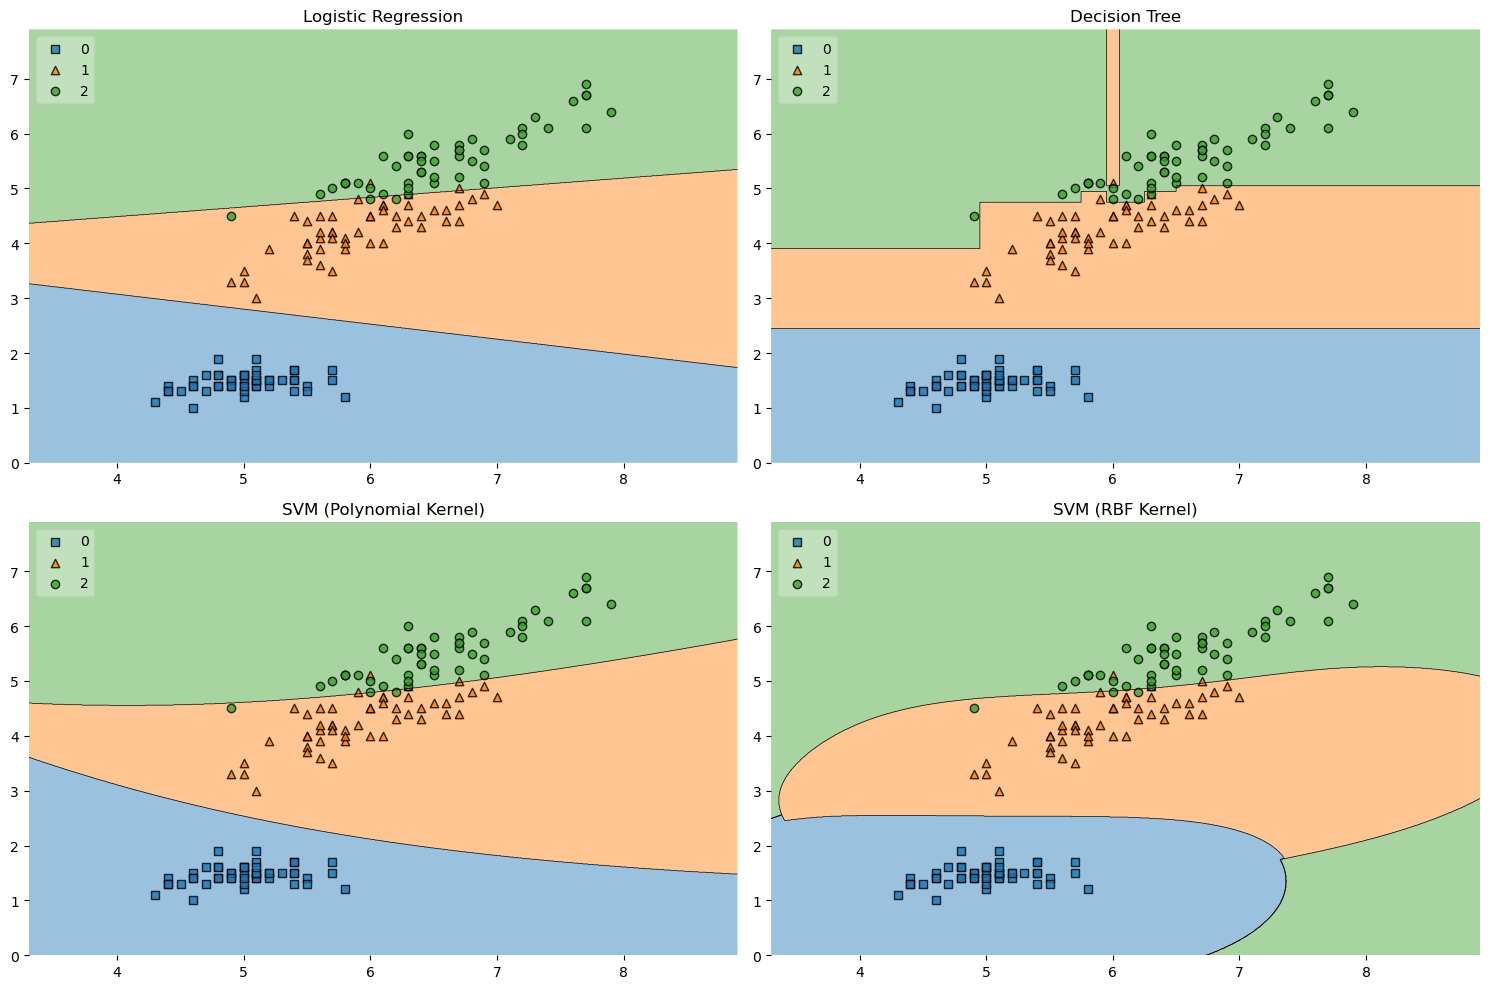

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools

# Loading some example data
iris = datasets.load_iris()
X = iris.data[:, [0, 2]]  # Using features for plotting
y = iris.target

def compare_models(X, y):
    # Initializing classifiers
    clf1 = LogisticRegression(random_state=1, solver='newton-cg')
    clf2 = DecisionTreeClassifier(random_state=1)
    clf3 = SVC(kernel='poly', degree=3, random_state=1)
    clf4 = SVC(kernel='rbf', gamma='auto', random_state=1)

    # Creating a grid layout for plots
    gs = gridspec.GridSpec(2, 2)
    fig = plt.figure(figsize=(15, 10))

    # Classifier labels
    labels = ['Logistic Regression', 'Decision Tree', 'SVM (Polynomial Kernel)', 'SVM (RBF Kernel)']

    # Loop over classifiers, labels, and grid positions
    for clf, label, grd in zip([clf1, clf2, clf3, clf4],
                               labels,
                               itertools.product([0, 1], repeat=2)):
        # Fit classifier
        clf.fit(X, y)

        # Plot decision regions
        ax = plt.subplot(gs[grd[0], grd[1]])
        plot_decision_regions(X, y, clf=clf, legend=2, ax=ax)
        plt.title(label)

    # Adjust layout and show the plots
    plt.tight_layout()
    plt.show()

# Call the function to compare models
compare_models(X, y)


## Comparison on logical_xor

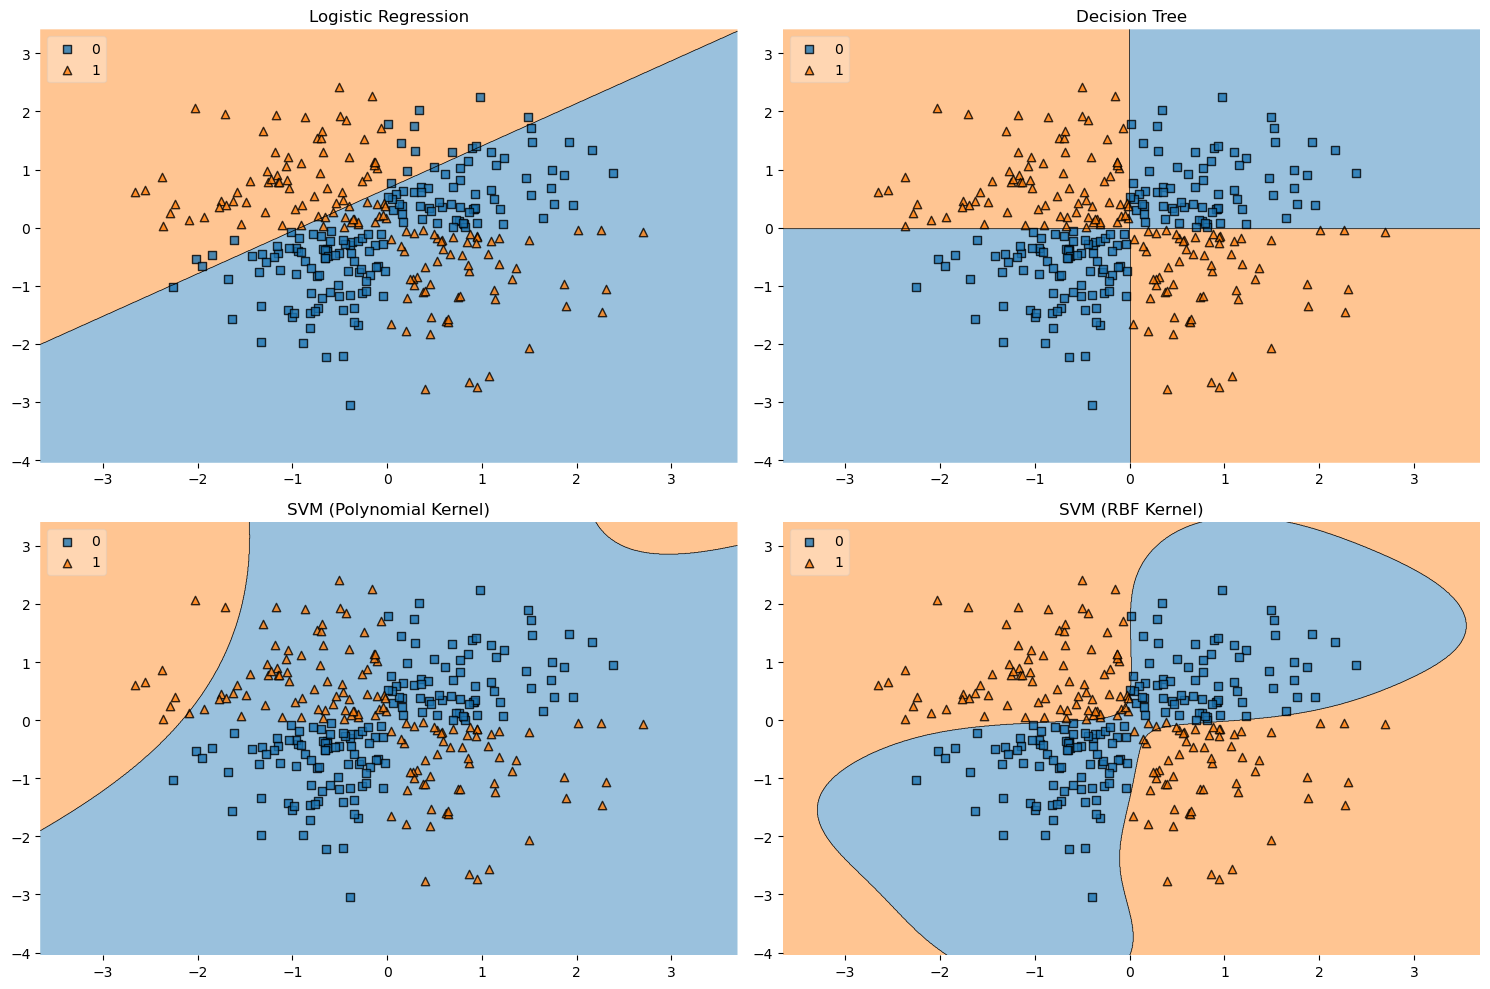

In [25]:
xx, yy = np.meshgrid(np.linspace(-3, 3, 50),
                     np.linspace(-3, 3, 50))
rng = np.random.RandomState(0)
X = rng.randn(300, 2)
y = np.array(np.logical_xor(X[:, 0] > 0, X[:, 1] > 0),
             dtype=int)

compare_models(X,y)

## Comparison on Moons data

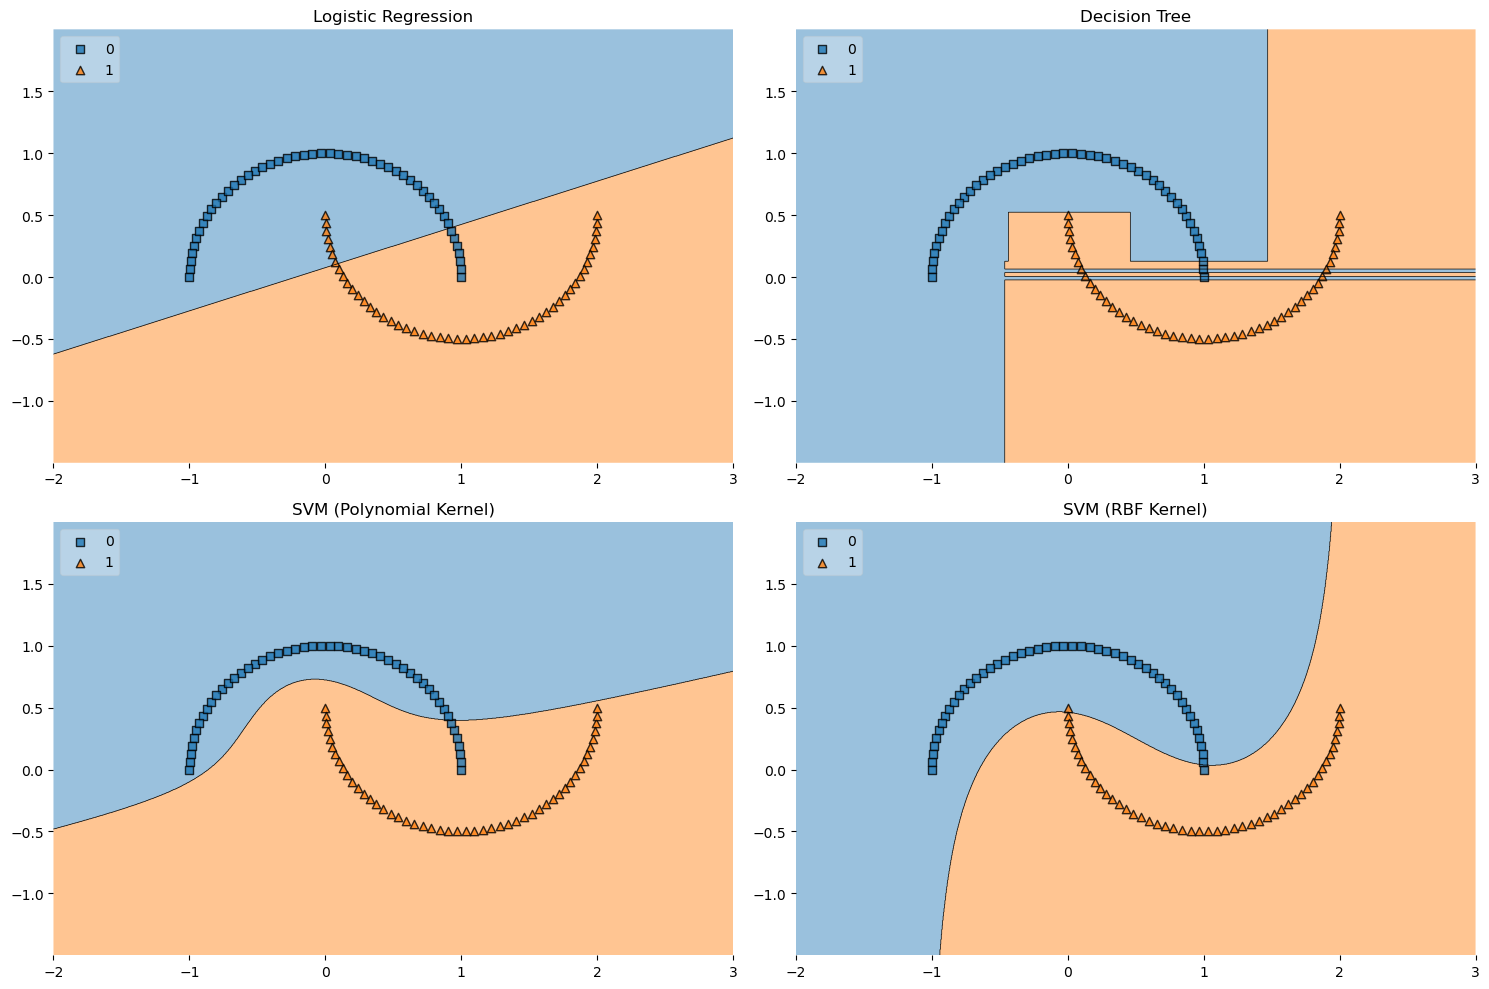

In [27]:
X, y = datasets.make_moons(n_samples=100, random_state=123)

compare_models(X,y)

## Comparison on Circles data

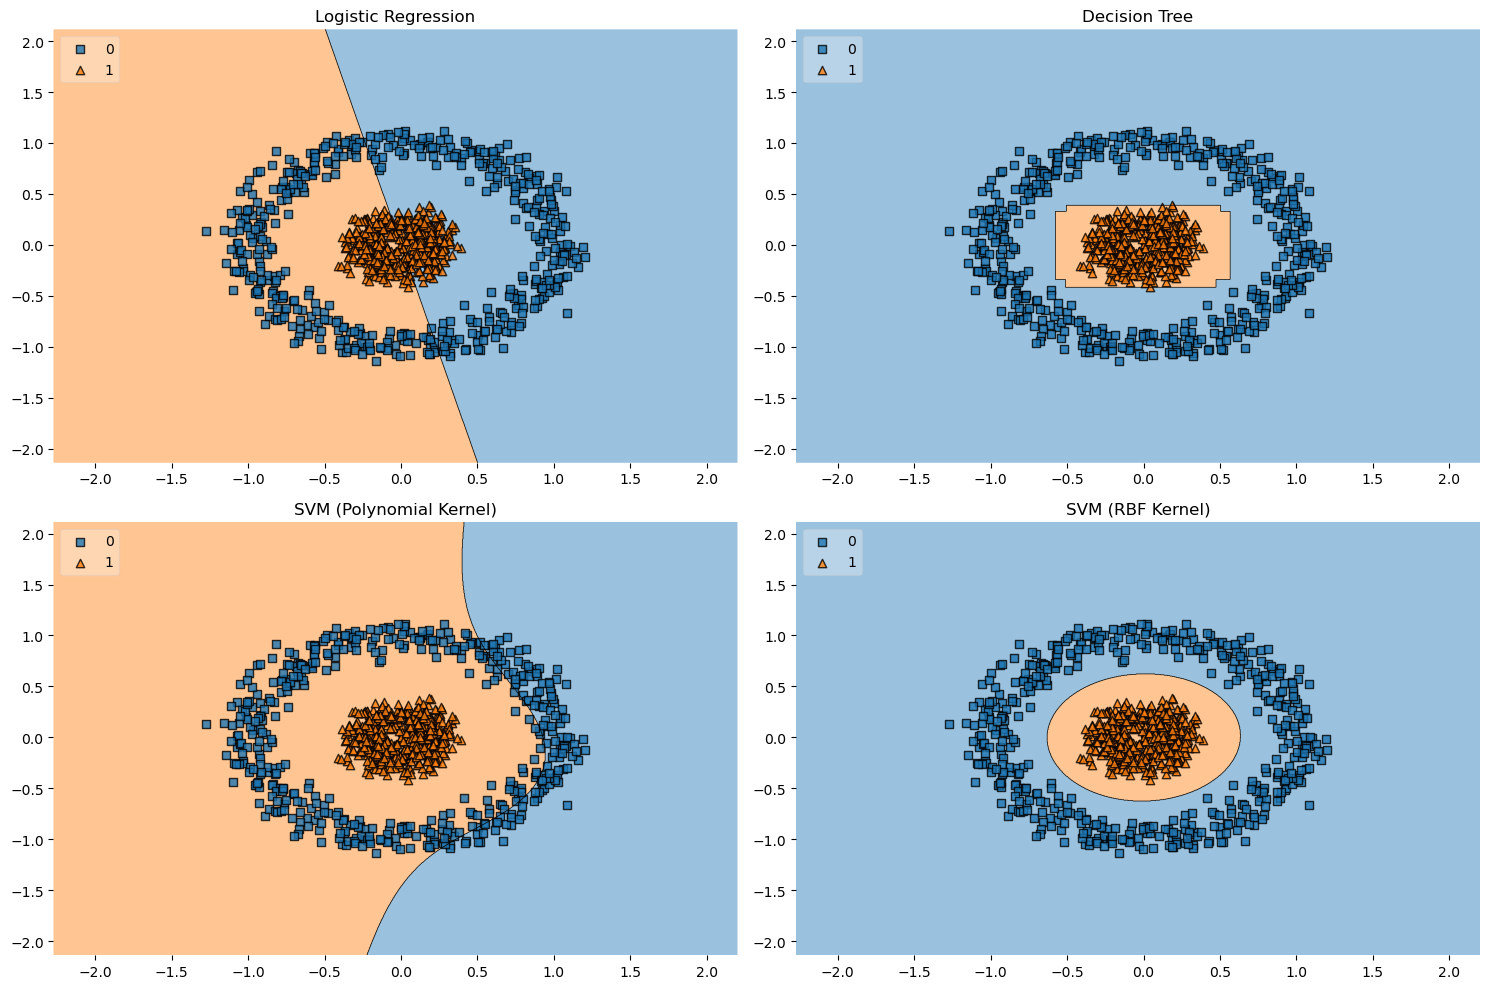

In [28]:
X, y = datasets.make_circles(n_samples=1000, random_state=123, noise=0.1, factor=0.2)

compare_models(X,y)

## Self-practice

Using a dataset(containing more than 5000 data points) of your choice apply the following models:

1. Regression tree
2. SVM (use kernel of your choice)
3. Simple Neural Network (with two or three hidden layers)

Compare the ML models using the appropriate metrics